### Python 機器學習
* 比賽簡介: 在這個比賽中，你的任務是預測在「星際泰坦尼克號」飛船與時空異常相撞時，是否有乘客被傳送到了另一個維度。為了幫助你進行這些預測，你將得到從飛船受損的計算機系統中恢復出的一組個人記錄。

* 選擇原因: 這次期中我選的題目，是spaceship-titanic，選這個題目是因為我對於Python機器學習還是新手，因此選了跟課堂相關的題目，可以跟課堂一起做搭配，讓自己可以對老師的教的東西更加熟悉，把基礎練好，讓自己可以有良好的基底可以應付未來相關更深層的應用，或許對未來會更有幫助!

* 資料集,目標介紹: 
1. train.csv - 約兩千七百名乘客的個人記錄，佔全部乘客人數的約三分之二，可用作訓練數據。
2. PassengerId - 每個乘客的唯一識別號。每個識別號的格式為gggg_pp，其中gggg表示乘客所在的組，pp表示乘客在該組中的編號。同一組 中的人通常是家人，但不一定都是。
3. HomePlanet - 乘客出發的星球，通常是他們的常住星球。
4. CryoSleep - 指示乘客是否選擇在整個航行期間進入懸浮動能狀態。進入懸浮動能狀態的乘客被限制在自己的艙室內。
5. Cabin - 乘客入住的艙室號碼。格式為deck/num/side，其中side可以是P表示左舷，也可以是S表示右舷。
6. Destination - 乘客將要下船的星球。
7. Age - 乘客的年齡。
8. VIP - 乘客是否支付了豪華服務費。
9. RoomService、FoodCourt、ShoppingMall、Spa、VRDeck - 乘客在“星際泰坦尼克號”的許多豪華設施中的消費金額。
10. Name - 乘客的名字和姓氏。
11. Transported - 乘客是否被傳送到另一個維度。這是目標，也就是你要預測的列。
12. test.csv - 其餘約一千四百名乘客的個人記錄，佔全部乘客人數的約三分之一，可用作測試數據。你的任務是預測該組乘客的Transported值。
13. sample_submission.csv - 正確格式的提交文件。
14. PassengerId - 測試集中每個乘客的識別號。
15. Transported - 目標。對於每個乘客，預測True或False。


* 引入數據處理工具

In [368]:
import pandas as pd

* 提供數值運算

In [369]:
import numpy as np

* 提供可視化庫，繪製各種圖表

In [370]:
import matplotlib.pyplot as plt

* 可以快速繪製各種統計圖表，通常比Matplotlib更美觀、易讀

In [371]:
import seaborn as sns

* 利用Panda讀進資料

In [372]:
df=pd.read_csv("spaceship-titanic/train.csv")

* 我先讀前五筆資料初步了解到各個資料型態及意義，並開始分析要如何處理資料，判斷哪些資料是有用那些資料那些是沒用，這裡我首先知道PassengerId是判斷名稱的，以及之後需要用它，因次對他先不用處理。後來發現RoomService	FoodCourt,ShoppingMall,Spa,VRDeck應該是類似的資料，並且都是以數字表示，或許之後可以一起處理，而所代表的意義跟VIP也許有關連，之後可以一起觀察。再來發現Name、Cabin的資料比較難進行分析，且較沒有關聯，或許之後用不到，可以再之後訓練時丟掉，這些是我初步觀察的結果。

In [373]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


* 這裡我先觀察數字類型的資料，發現在RoomService,FoodCourt,ShoppingMall,Spa,VRDeck的最大值到非常大，或許會影響之後的判斷，而Age就比較平均一點。

In [374]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


* 在這行程式我觀察各資料的型態，了解到之後要將那些資料進行數字轉換，其中RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Age就是數字，已經不用轉換了，或許只要填補缺失值就好了，而HomePlanet,CryoSleep,Cabin,Destination,VIP都是object，之後也許要轉換型態。

In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


* 在這裡我已經初步判斷資料了，在判斷眾多資料中，我認為Name對於之後訓練應該是沒有用的，應此先把它扔掉以利後續觀察

In [376]:
df.drop('Name',axis=1,inplace=True)

* 這裡來到了以圖性判斷資料，首先我做了以HomePlanet的突來觀察HomePlanet的資料，了解到它有幾種不同的值及數量分布，發現只有三種且不會太極端，之後也許可以把納進訓練考量。

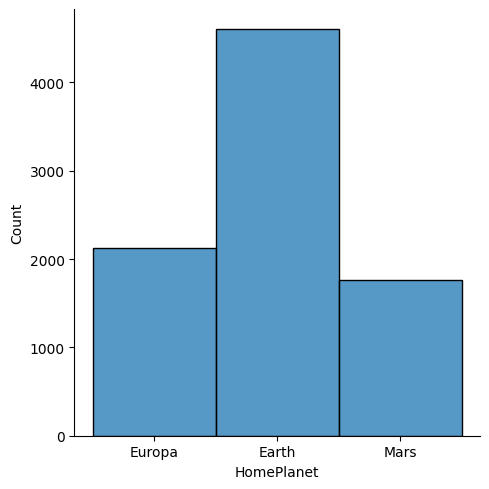

In [377]:
sns.displot(df['HomePlanet'])

* 這裡因為HomePlanet跟Destination有異曲同工之處，也就拿出來觀察，發現也是三個不同的地方，而數量比HomePlanet稍微更極端一點，不過還在可接受範圍。

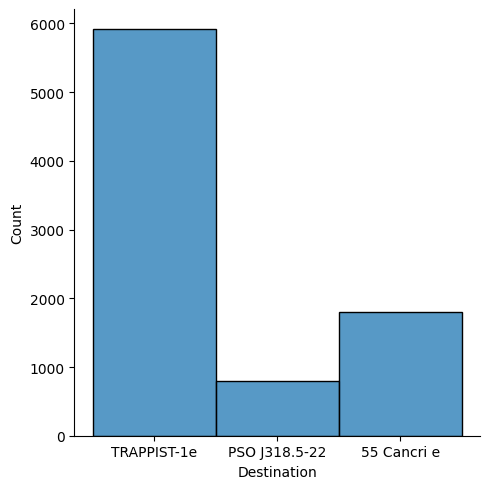

In [378]:
sns.displot(df['Destination'])

* 接下來我就開始觀察VIP與RoomService，這裡可以發現大部分人是沒有VIP的，而沒有VIP和有VIP的RoomService價格是沒有VIP的人在價格高的地方比有VIP的人多一點，這樣看起來關聯有一點點，但不到很多。

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


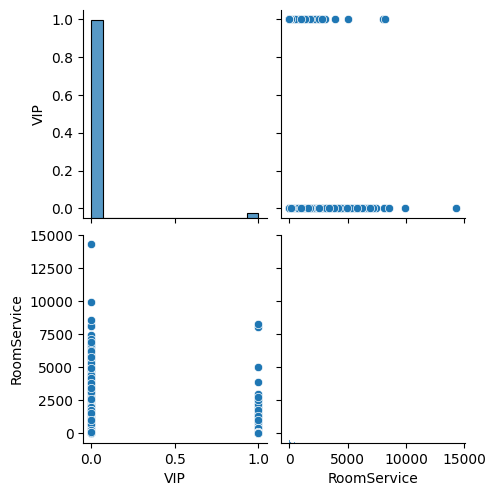

In [379]:
sns.pairplot(df[['VIP','RoomService']],dropna=True)

* 接著是VIP與ShoppingMall的關聯，發現與RoomService現象差不多，都是沒有VIP分布價格會較廣，所以在ShoppingMall中較貴的價格沒有VIP人比較多。

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


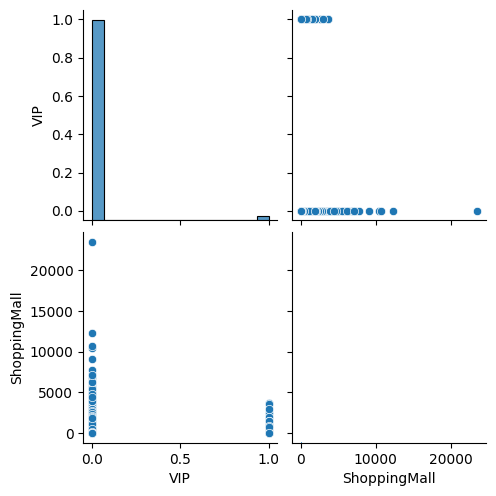

In [380]:
sns.pairplot(df[['VIP','ShoppingMall']],dropna=True)

* 這裡我進行VIP與FoodCourt的觀察，在這裡分布也是跟前面兩個做的觀察差不多，微小的不同在於變有VIP的人在FoodCourt中價格高的地方開始比沒VIP多人。不過在經歷這VIP與RoomService,ShoppingMall,Foodcourt三個判斷，我認為VIP與這三個應該沒什麼關連，因為主要是沒有VIP的人太多了，他們的人更容易分布均勻，比較沒有參考性，因此我就不對後面Spa, VRdeck做判斷了。

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


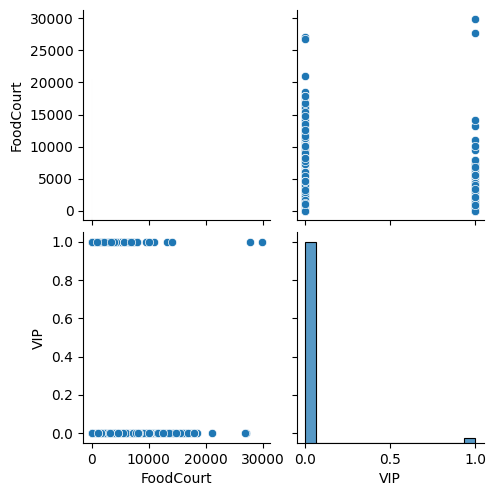

In [381]:
sns.pairplot(df[['FoodCourt','VIP']],dropna=True)

* 這裡我開始做我最主要的目標'Transported'與其他資料的關聯，首先是CryoSleep但發現CryoSleep也許是資料型態的問題，他們兩者都是TrueFalse，因而無法比對

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


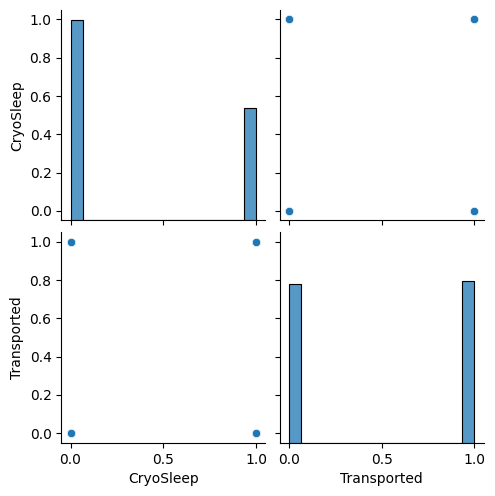

In [382]:
sns.pairplot(df[['CryoSleep','Transported']],dropna=True)

* 接下來我將FoodCourt與Transported進行觀察，發現Transport為1時，FoodCourt價格偏高的人數較多，之後也許納進考量

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


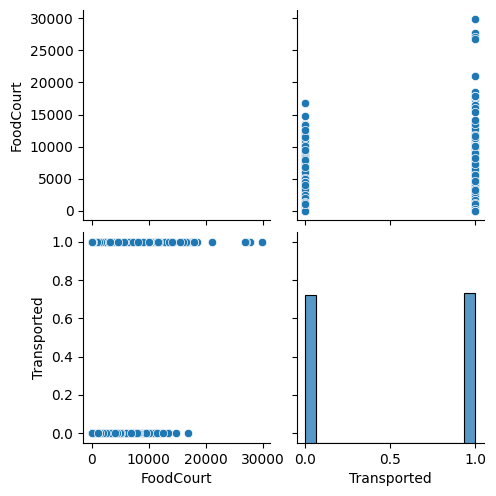

In [383]:
sns.pairplot(df[['FoodCourt','Transported']],dropna=True)

* 換成RoomService與Transported比較，發現跟FoodCourt有差別，變成Transport為0時，使用FoodCourt價格高的人較多，雖然看似只有影響一點點，但我認為這些都值得加進去考量裡。

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


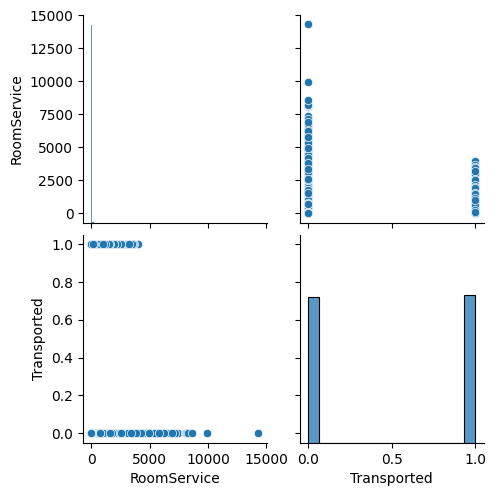

In [384]:
sns.pairplot(df[['RoomService','Transported']],dropna=True)

* 最後我來觀察Transported值，也就是我的目標，發現訓練時，是分為1,0，兩者滿平均的。

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


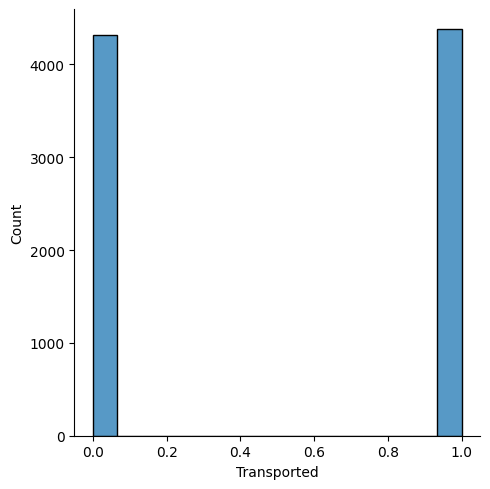

In [385]:
sns.displot(df["Transported"])

* 這裡我想觀察以Transport為分組有關數值的分析，我發現這裡目前看不出甚麼情況，因為RoomService,Spa,VRDeck在Transported為False時價值平均比較高，但在FoodCourt,ShoppingMall反而相反，但都是會影響Transport的因素，因此我會將他們納入考量

In [386]:
df.groupby('Transported').mean()

C:\Users\user\AppData\Local\Temp\ipykernel_16920\3231074193.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Transported').mean()


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Transported,,,,,,
False,29.922858,389.266066,382.615930,167.566217,564.382666,543.629822
True,27.748834,63.098021,532.691984,179.829972,61.675531,69.148131


* 到此為止，觀察都已經結束了，我認為RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Age,PassengerID,VIP,CryoSleep也許是會影響的因素，因此接下來要對他們進行操作，而Cabin我認為在觀察中，影響不大，因此我把它扔掉以便之後訓練

In [ ]:
df.drop('Cabin',axis=1 ,inplace=True)

* 這裡臨時想看一下這些乘客的年齡平均數，想了解會不會很極端。我取年齡的平均數做觀察，發現年齡滿平均的，大概成年人上下

In [387]:
df['Age'].mean()

28.82793046746535

* 這裡觀察到此為止了，我就要開始準備填補缺失值了。因此我先了解各項欄位的缺失值，了解要進行那些填補作業。發現除了PassengerId和Transported之外，每個都有缺失值，接下來就要開始準備填補缺失值了。

In [388]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

* 這裡年齡的缺失值，我運用年齡的平均去彌補，達到一個跟原本資料較為平衡的結果。

In [389]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

* 這裡我觀察RoomService的值大概分布，發現大部分的值都是0，在之後進行填補時，可以用0來補。

In [390]:
df['RoomService'].value_counts()


0.0       5577
1.0        117
2.0         79
3.0         61
4.0         47
          ... 
1612.0       1
2598.0       1
632.0        1
378.0        1
745.0        1
Name: RoomService, Length: 1273, dtype: int64

* 這裡在觀察FoodCourt的值分布，發現也是大部分為0，之後同樣用0進行填補，而後面我接續進行FoodCourt, ShoppingMall, Spa,Vrdeck的觀察，發現跟之前觀察都一樣，超過一半都是為0，因此接下來就要用0對上述觀察的進行填補。

In [391]:
df['FoodCourt'].value_counts()

0.0       5456
1.0        116
2.0         75
3.0         53
4.0         53
          ... 
3846.0       1
5193.0       1
312.0        1
827.0        1
4688.0       1
Name: FoodCourt, Length: 1507, dtype: int64

In [392]:
df['ShoppingMall'].value_counts()

0.0       5587
1.0        153
2.0         80
3.0         59
4.0         45
          ... 
3627.0       1
2074.0       1
871.0        1
742.0        1
1872.0       1
Name: ShoppingMall, Length: 1115, dtype: int64

In [393]:
df['Spa'].value_counts()

0.0       5324
1.0        146
2.0        105
5.0         53
3.0         53
          ... 
273.0        1
2581.0       1
2948.0       1
3778.0       1
1643.0       1
Name: Spa, Length: 1327, dtype: int64

In [394]:
df['VRDeck'].value_counts()

0.0       5495
1.0        139
2.0         70
3.0         56
5.0         51
          ... 
408.0        1
876.0        1
2891.0       1
2102.0       1
3235.0       1
Name: VRDeck, Length: 1306, dtype: int64

* 這裡就是將RoomService, FoodCourt, ShoppingMall, Spa, Vrdeck 用0進行填補。在進行填補之後訓練的成果會更加準確。

In [395]:
df['RoomService'].fillna(0,inplace=True)
df['FoodCourt'].fillna(0,inplace=True)
df['ShoppingMall'].fillna(0,inplace=True)
df['Spa'].fillna(0,inplace=True)
df['VRDeck'].fillna(0,inplace=True)

* 這裡我想確認剛剛的操作，所以再次確認每個欄位的缺空數多少，發現剛剛填補都有進行補上了，缺失值都變成0了。

In [396]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

* 這裡就開始進行變數轉換，利用pd.get.dummies()將類別變數轉會為多個虛擬變數。之前觀察的VIP, HomePlanet, Destination, CryoSleep都是類別變數，因此在這裡將他們進行轉換。

In [397]:
df=pd.get_dummies(data=df,columns=['VIP','HomePlanet','Destination','CryoSleep'])

* 這裡確認剛剛操作是否成功，觀察前五筆資料來看，發現轉換成功了。

In [398]:
df.head()

,PassengerId,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,VIP_False,VIP_True,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_False,CryoSleep_True
0,0001_01,B/0/P,39.0,0.0,0.0,0.0,0.0,0.0,False,1,0,0,1,0,0,0,1,1,0
1,0002_01,F/0/S,24.0,109.0,9.0,25.0,549.0,44.0,True,1,0,1,0,0,0,0,1,1,0
2,0003_01,A/0/S,58.0,43.0,3576.0,0.0,6715.0,49.0,False,0,1,0,1,0,0,0,1,1,0
3,0003_02,A/0/S,33.0,0.0,1283.0,371.0,3329.0,193.0,False,1,0,0,1,0,0,0,1,1,0
4,0004_01,F/1/S,16.0,303.0,70.0,151.0,565.0,2.0,True,1,0,1,0,0,0,0,1,1,0


* 藉由上圖觀察的結果，因為CryoSleep和VIP都是True和False，只會有兩種值，因此我把'CryoSleep_False','VIP_False'丟掉，只剩下True的，讓在訓練時，不會因為重複的關係讓機器學習更複雜。

In [399]:
df.drop(['CryoSleep_False','VIP_False'],axis=1,inplace=True)

* 這裡確認我剛才的操作有沒有問題，觀察前五筆資料，發現成功丟掉，CryoSleep和VIP只留下有關True的資料

In [402]:
df.head()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,VIP_True,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_True
0,0001_01,39.0,0.0,0.0,0.0,0.0,0.0,False,0,0,1,0,0,0,1,0
1,0002_01,24.0,109.0,9.0,25.0,549.0,44.0,True,0,1,0,0,0,0,1,0
2,0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0,False,1,0,1,0,0,0,1,0
3,0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0,False,0,0,1,0,0,0,1,0
4,0004_01,16.0,303.0,70.0,151.0,565.0,2.0,True,0,1,0,0,0,0,1,0


* 這裡最後確認有沒有缺失值，發現每項都已經為0，而所有資料都已經確定下來，接下來可以準備進行訓練。

In [403]:
df.isnull().sum()

PassengerId                  0
Age                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Transported                  0
VIP_True                     0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
CryoSleep_True               0
dtype: int64

* 這裡我使用了Scikit-learn庫中的train_test_split函數，用於將資料集切分成訓練集和測試集。其中，X儲存了資料集中除了目標變數（Transported）以外的所有特徵，而y則儲存了目標變數。test_size參數設置了測試集的比例，random_state則指定了隨機種子，以確保每次切分的結果一致。
* 最終，函數會返回四個變數：X_train（訓練集的特徵）、X_test（測試集的特徵）、y_train（訓練集的目標變數）和y_test（測試集的目標變數）

In [405]:
from sklearn.model_selection import train_test_split
X = df.drop(['Transported'],axis=1)
y=df['Transported']
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=67)

* 這裡使用Scikit-learn庫中的LogisticRegression類別，用於建立邏輯回歸模型。首先建立了一個LogisticRegression物件lr，接著使用fit()方法來訓練模型。訓練完成後，可以使用predict()方法進行預測，傳入的參數為測試集的特徵集X_test，並將結果儲存在predictions變數中。

In [406]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
predictions=lr.predict(X_test)

* 這裡引用metrics獏組，包括混淆矩陣（confusion_matrix）、正確率（accuracy_score）、召回率（recall_score）和精確率（precision_score）。準備進行正確率、召回率、精確率的觀察。

In [407]:
from sklearn.metrics import confusion_matrix,accuracy_score, recall_score, precision_score

* 正確率（accuracy_score）是指預測正確(是否成功Transported)的樣本數佔總樣本數的比例，這裡我的正確率為0.78多。

In [408]:
accuracy_score(y_test,predictions)

0.781058282208589

* 召回率（recall_score）是指實際正例中預測正確的樣本數佔實際正例的比例，這裡我的召回率0.89多。

In [409]:
recall_score(y_test,predictions)

0.8986280487804879

* 精確率（precision_score）是指預測正例中實際正確的樣本數佔預測正例的比例，我的精確率為0,79

In [410]:
precision_score(y_test,predictions)

0.7291280148423006

* 這裡利用混淆矩陣觀察我的成果有沒有符合上述的觀察，經過計算後我發現跟上述計算符合。

In [411]:
pd.DataFrame(confusion_matrix(y_test,predictions),columns=['Predictnot not Transported', 'Predict Transported'],index=['True not Transported','True Transported'])


,Predictnot not Transported,Predict Transported
True not Transported,858,438
True Transported,133,1179


* 接下來就開始用比賽測試資料來利用我上述進行訓練的方法來訓練，方法跟上面一樣，主要是處理是否符合比賽格式問題。

In [412]:
import joblib

In [413]:
joblib.dump(lr,'spaceshiptitanic.pkl',compress=3)


['spaceshiptitanic.pkl']

In [414]:
model_pretrained=joblib.load('spaceshiptitanic.pkl')

In [415]:
df_test=pd.read_csv("spaceship-titanic/test.csv")

In [416]:
df_test.drop(['Name','Cabin'],axis=1,inplace=True)

In [417]:
df_test=pd.get_dummies(data=df_test,columns=['VIP','HomePlanet','Destination','CryoSleep'])

In [418]:
df_test['RoomService'].fillna(0,inplace=True)
df_test['FoodCourt'].fillna(0,inplace=True)
df_test['ShoppingMall'].fillna(0,inplace=True)
df_test['Spa'].fillna(0,inplace=True)
df_test['VRDeck'].fillna(0,inplace=True)

In [419]:
df_test['Age'].fillna(df_test['Age'].mean(),inplace=True)

In [420]:
df_test.drop(['VIP_False','CryoSleep_False'],axis=1, inplace=True)

In [421]:
predictions2=model_pretrained.predict(df_test)
predictions2

array([ True, False,  True, ...,  True,  True,  True])

* 這裡就剩格式的問題，我先操作PassengerID讓它是符合參賽格式的。

In [422]:
forSubmissionDF=pd.DataFrame(columns=['PassengerId','Transported'])

In [423]:
forSubmissionDF['PassengerId']=df_test['PassengerId']

In [424]:
forSubmissionDF

,PassengerId,Transported
0,0013_01,NaN
1,0018_01,NaN
2,0019_01,NaN
3,0021_01,NaN
4,0023_01,NaN
...,...,...
4272,9266_02,NaN
4273,9269_01,NaN
4274,9271_01,NaN
4275,9273_01,NaN


* 最後把值套到我的forSubmissionDF就完成了。

In [425]:
forSubmissionDF['Transported']=predictions2

In [426]:
forSubmissionDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
 1   Transported  4277 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 37.7+ KB


In [427]:
forSubmissionDF.to_csv('for_submission_space1.csv',index=False)

* 成果顯現

In [428]:
forSubmissionDF

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


![Alt text](spaceship-titanic/kago.jpg)


#### 結果說明:
* 最後我的成果為上圖所示，評分為0.78700，排名為1496，我的準確率為0.78，預測成功傳送到另一個維度佔全體為0.78。
#### 課程關聯: 
* 這次課程主要關聯課堂上做的鐵達尼號，先分析資料，了解資料的一些相關性，看資料有沒有關我的目標，把沒有用的資料把它丟掉。再來為型態為Object的建立虛擬件數，並觀察空的值來看要利用甚麼補，最後就主要利用建立邏輯回歸模型來訓練，並生成結果。
#### 事後檢討:
1. 研究要如何提升我的分數，這次我的分數只要0.78，排名中間，需要了解到我哪個步驟做的不夠，哪個地方進行的觀察或訓練還不夠。
2. 在特徵部分，也是可以再分析個更加仔細，像是HomePlanet，Destinatiion我只是單純轉換虛擬變數而已，或許可以觀察每個人HomePlanet對應到Destination有甚麼關聯，並把所有人的資料進行平均觀察，可以了解到HomePlanet和Destination有甚麼關聯性
3. 模型選擇: 可以嘗試使用不同的機器學習模型來達到更加精確的成果。
4. 調整參數:在填補 RoomService、FoodCourt、ShoppingMall、Spa、VRDeck中，我只因為看到超過一半都為0，就填了0代替空值，但極端值卻非常高，或許可以之後拿掉極端值，讓訓練可以更加準確。
5. 了解不同題目的資料或訓練方法，讓可以用的方法不再單一
6. 每部動作都需要查證，不能只以我認為怎樣，就怎麼做，像是這次我認為Cabin沒有用就把它丟掉，但如果把它進行分析，說不定會有意想不到的結果。

#### 心得:
* 在做完之後，我發現雖然機器學習入門很簡單，看似只要套模組，並引用裡面的模型，但光是這樣可能還是不夠。在訓練前資料分析這塊隊訓練也是非常重要的，考慮對特徵進行更深入的分析，查看哪些特徵對預測目標最有影響，這樣訓練結果獲更加準確。而在算法上也是有不同的算法，像是線性分析、決策樹，隨機森林等，每個都是需要經過很長時間摸索才能熟悉的。在資料分析完後，了解到最適合有甚麼算法進行訓練，這樣成果也會更好。而對我來說，這次做的作業基本核心還是以老師課堂交的為主，比較少進階應用，想說先把基礎練熟，但到後來發現，這些資料處理步驟很大部分都是課堂上講過了，再做一次雖然更熟悉，但就沒有新鮮感了。或許之後可以挑戰更進階的來給自己挑戰性，嘗試不同的可能，讓自己的實力可以更加的深厚。雖然這當中會遇到很多困難，需要一直上網查，但如果想在變化如此快的科技世界存活下去，也只有去不斷學習的新事物了!
